# Motivación:

El cine es una de las formas más influyentes y apreciadas de arte y entretenimiento en todo el mundo. Cada película es una obra maestra única que narra historias cautivadoras, despierta emociones y provoca reflexiones profundas. Detrás de estas obras de arte se encuentra una vasta industria cinematográfica que involucra a miles de profesionales creativos y técnicos. La exploración y comprensión de este mundo es un desafío intrigante, y los datos sobre películas nos brindan una ventana a este universo fascinante.

Este dataset cinematográfico nos sumerge en un viaje a través del tiempo y el espacio cinematográfico. Desde los primeros días del cine mudo hasta las épicas producciones contemporáneas, este conjunto de datos ofrece una visión panorámica de la evolución del cine. Nos permite explorar tendencias en géneros cinematográficos, evaluar la popularidad de las películas a lo largo del tiempo y descubrir cómo factores como el presupuesto y las calificaciones influyen en el éxito de una película.

# Audiencia:

Nuestra audiencia abarca a un amplio espectro de entusiastas del cine, estudiantes, académicos, críticos, profesionales de la industria cinematográfica y cualquier persona interesada en descubrir los secretos detrás de sus películas favoritas. Este conjunto de datos es una herramienta valiosa para varios propósitos:

* Investigación Académica: Investigadores y académicos pueden utilizar estos datos para analizar tendencias en la industria cinematográfica, estudiar la relación entre presupuesto y éxito, o explorar la evolución de géneros a lo largo del tiempo.

* Profesionales de la Industria: Profesionales de la industria cinematográfica pueden obtener información sobre lo que hace que una película sea exitosa y tomar decisiones más informadas en la producción y distribución de películas.

* Críticos de Cine: Críticos y aficionados al cine pueden utilizar los datos para evaluar el impacto de las calificaciones de películas en su popularidad y para descubrir gemas cinematográficas menos conocidas.

* Estudiantes y Curiosos: Los amantes del cine, estudiantes de cine y cualquier persona interesada en la magia del séptimo arte pueden explorar este conjunto de datos para obtener una comprensión más profunda de la historia del cine y las dinámicas detrás de sus películas favoritas.

En resumen, este dataset es una invitación a un emocionante viaje a través del mundo del cine, donde los datos se convierten en historias, y las películas se convierten en datos. Es una herramienta versátil que enriquecerá la experiencia de cualquiera que esté dispuesto a adentrarse en el asombroso universo cinematográfico.

# Preguntas/Hipótesis

## Preguntas Generales:

* ¿Cuál es la evolución a lo largo del tiempo de la cantidad de películas producidas?
* ¿Cuáles son los géneros cinematográficos más populares en diferentes décadas?
* ¿Existe una correlación entre el presupuesto de una película y su éxito en taquilla?
* ¿Cómo influyen las calificaciones de la audiencia en la popularidad de una película?
* ¿Cuál es la distribución de la duración de las películas en el dataset?
* ¿Cuál es la relación entre el voto promedio y la popularidad de una película?

## Preguntas sobre Géneros:

* ¿Cuál es el género cinematográfico más común en el dataset?
* ¿Existen tendencias en la popularidad de géneros específicos a lo largo del tiempo?
* ¿Cuál es la relación entre el presupuesto y el género de una película?
* ¿Cuál es la correlación entre el voto promedio y el género de una película?

## Preguntas sobre Directores y Actores:

* ¿Quiénes son los directores más prolíficos en términos de películas producidas?
* ¿Hay una relación entre la participación de actores/actrices populares y el éxito de una película?
* ¿Cuáles son los actores y actrices más recurrentes en el dataset?

## Preguntas sobre Calificaciones y Éxito:

* ¿Existe una relación entre el voto promedio de una película y su éxito en taquilla?
* ¿Cuál es la tendencia de las calificaciones promedio de las películas a lo largo del tiempo?
* ¿Cómo se distribuyen las calificaciones de las películas entre críticos y audiencias?

## Preguntas sobre Presupuesto y Taquilla:

* ¿Cuál es la relación entre el presupuesto de producción y las ganancias en taquilla?
* ¿Existen géneros cinematográficos que tienden a tener un mayor retorno de inversión (ROI)?
* ¿Cuál es el presupuesto promedio de las películas a lo largo de los años?

## Preguntas sobre Fechas de Lanzamiento:

* ¿Hay meses específicos en los que se lanzan más películas?
* ¿Existe una temporada del año en la que las películas tienden a tener un mejor rendimiento en taquilla?
* ¿Cuál es la tendencia de lanzamiento de películas en diferentes décadas?

Estas son solo algunas de las preguntas e hipótesis que podremos explorar con en nuestro dataset de películas. Dependiendo de los intereses y objetivos, puedemos profundizar en una o más de estas preguntas utilizando técnicas de análisis de datos y visualización. 

# Definición de Objetivo:

El objetivo de este proyecto de data science es proporcionar a la industria cinematográfica y a los interesados en el cine un conjunto de análisis y herramientas que les permitan comprender mejor las tendencias, los factores de éxito y los patrones que influyen en la producción y el rendimiento de las películas. Buscamos extraer conocimientos valiosos de los datos disponibles para tomar decisiones informadas en la producción, distribución y evaluación de películas, así como para anticipar las preferencias de la audiencia.

# Contexto Comercial:

La industria cinematográfica es altamente competitiva y costosa. Las productoras invierten millones de dólares en la creación de películas y buscan maximizar su éxito en taquilla y en plataformas de streaming. Los estudios de cine, las productoras independientes y los inversores buscan constantemente identificar oportunidades de inversión, comprender los factores clave que impulsan el éxito y mitigar riesgos financieros. Además, las plataformas de streaming necesitan conocer las preferencias de su audiencia para ofrecer contenido relevante.

# Problema Comercial:

El problema comercial principal es optimizar la toma de decisiones en la industria cinematográfica. Esto incluye:

* Identificar qué géneros, directores, actores y presupuestos tienden a tener un mejor desempeño en términos de taquilla y calificaciones.
* Evaluar la relación entre la inversión en publicidad y el éxito en taquilla.
* Comprender las preferencias cambiantes de la audiencia a lo largo del tiempo y en diferentes regiones.
* Pronosticar el rendimiento potencial de una película antes de su lanzamiento para tomar decisiones de producción y distribución.
* Descubrir oportunidades de nicho y tendencias emergentes que puedan ser explotadas por productoras independientes y nuevas empresas en la industria cinematográfica.

# Contexto Analítico:

El contexto analítico implica el uso de técnicas de análisis de datos y herramientas de visualización para responder a las preguntas comerciales planteadas. Esto incluye:

* Análisis exploratorio de datos para comprender la distribución y las tendencias en el conjunto de datos de películas.
* Modelado de regresión para evaluar la influencia de diversas variables (presupuesto, género, calificaciones) en el éxito en taquilla.
* Segmentación de la audiencia y detección de patrones de preferencia utilizando algoritmos de aprendizaje automático.
* Creación de modelos predictivos para anticipar el rendimiento de una película en función de sus características y contexto de lanzamiento.
* Desarrollo de cuadros de mando y visualizaciones interactivas para que los interesados puedan explorar los datos y obtener información valiosa.

En resumen, este proyecto de data science busca aprovechar los datos sobre películas para ayudar a la industria cinematográfica a tomar decisiones más acertadas y a satisfacer las necesidades cambiantes de la audiencia, contribuyendo así al éxito continuo del séptimo arte.

# Análisis Exploratorio de Datos (EDA)

# Librerias

In [181]:
# Comencemos importando nuestras librerias
import pandas as pd
import numpy as np
import ast
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from datetime import datetime

pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid') 
sns.set(font_scale = 1)

# Presentación DataSet

In [182]:
url = 'https://raw.githubusercontent.com/ApocalypseScrambler/datascience/main/Movie%20Recommendation%20System/tmdb_5000_movies.csv'
url_2 = 'https://raw.githubusercontent.com/ApocalypseScrambler/datascience/main/Movie%20Recommendation%20System/tmdb_5000_credits.csv'

# Levanto el archivo 
df_movies = pd.read_csv(url,sep = ',')
# Reordenemos el dataframe
df_movies = df_movies[['id', 'budget', 'genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries',
                'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']]
# Importamos el segundo archivo
df_credits = pd.read_csv(url_2,sep = ',')

#Unamos los dos dataframes
df_movies = pd.merge(df_movies, df_credits, on="id", how="outer")

#Cambiemos el indice
df_movies.index = df_movies['id']
df_movies = df_movies.drop('id', axis='columns')

# Vamos algunos de sus datos
print(df_movies.head())


           budget                                             genres  \
id                                                                     
19995   237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
285     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
206647  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
49026   250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
49529   260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            homepage  \
id                                                     
19995                    http://www.avatarmovie.com/   
285     http://disney.go.com/disneypictures/pirates/   
206647   http://www.sonypictures.com/movies/spectre/   
49026             http://www.thedarkknightrises.com/   
49529           http://movies.disney.com/john-carter   

                                                 keywords original_language  \
id                     

In [183]:
#Descripción de las columnas
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 19995 to 25975
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

## Columnas 

* budget - El presupuesto con el que se hizo la película.
* genres - Los géneros de la película, acción, comedia, suspense, etc.
* homepage - Un enlace a la página de inicio de la película.
* keywords - Las palabras clave o etiquetas relacionadas con la película.
* original_language - El idioma en el que se hizo la película.
* original_title - El título de la película antes de la traducción o adaptación.
* overview - Una breve descripción de la película.
* popularity - Una cantidad numérica que especifica la popularidad de la película.
* production_companies - La casa productora de la película.
* production_countries - El país en el que se produjo.
* release_date - La fecha en que fue lanzada.
* revenue - Los ingresos mundiales generados por la película..
* runtime - El tiempo de ejecución de la película en minutos.
* status - "Released" or "Rumored".
* tagline - Eslogan de la película.
* title - Título de la película.
* vote_average - Calificaciones promedio que recibió la película.
* vote_count - el recuento de votos recibidos.
* cast - El nombre de los actores principales y secundarios.
* crew - El nombre del Director, Editor, Compositor, Escritor, etc.

In [184]:
#Como podemos apreciar tenemos dos columnas con los mismos datos luego de la unión. Eliminemos una de ellas.
print(df_movies[['title_x','title_y']].head())

#Eliminemos la columna repetida
df_movies = df_movies.drop(['title_y'], axis=1)

#Cambiamos el nombre
df_movies.rename(columns={'title_x': 'title'}, inplace=True)

                                         title_x  \
id                                                 
19995                                     Avatar   
285     Pirates of the Caribbean: At World's End   
206647                                   Spectre   
49026                      The Dark Knight Rises   
49529                                John Carter   

                                         title_y  
id                                                
19995                                     Avatar  
285     Pirates of the Caribbean: At World's End  
206647                                   Spectre  
49026                      The Dark Knight Rises  
49529                                John Carter  


## Missing Data

In [185]:
#Veamos ahora que campos nos quedan en null
print('Nulls')
print('----------------------------')
print(df_movies.isnull().sum())

Nulls
----------------------------
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64


In [186]:
# Eliminamos los registros con nulos de release_date y overview ya que son pocos
df_movies = df_movies.dropna(subset=['release_date', 'overview'])

# Tambien nos aseguramos que el campo release_date sea considerado como una fecha como tal
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

# Creamos una nueva columna con true o false, si la película posee o no página web
df_movies['website'] = df_movies['homepage'].notna()

# Eliminamos la columna homepage
del df_movies['homepage']

# Mantenemos la columna tagline de momento
print('Nulls')
print('----------------------------')
print(df_movies.isnull().sum())

Nulls
----------------------------
budget                    0
genres                    0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                 840
title                     0
vote_average              0
vote_count                0
cast                      0
crew                      0
website                   0
dtype: int64


In [187]:
#Veamos algunos datos generales de los campos númericos
print(df_movies.describe())

            budget  popularity                   release_date       revenue  \
count      4799.00     4799.00                           4799       4799.00   
mean   29065933.22       21.51  2002-12-25 03:47:26.843092480   82329203.47   
min           0.00        0.00            1916-09-04 00:00:00          0.00   
25%      800000.00        4.69            1999-07-11 12:00:00          0.00   
50%    15000000.00       12.93            2005-09-30 00:00:00   19184015.00   
75%    40000000.00       28.35            2011-02-14 00:00:00   92956519.00   
max   380000000.00      875.58            2017-02-03 00:00:00 2787965087.00   
std    40732511.64       31.82                            NaN  162907644.10   

       runtime  vote_average  vote_count  
count  4799.00       4799.00     4799.00  
mean    106.90          6.09      690.79  
min       0.00          0.00        0.00  
25%      94.00          5.60       54.00  
50%     103.00          6.20      236.00  
75%     118.00          6.80  

In [188]:
#Veamos cuantos campos en cero tenemos
nun_missing = (df_movies[['budget','popularity','revenue','runtime','vote_average','vote_count']] == 0).sum()
print(nun_missing)

budget          1036
popularity         0
revenue         1423
runtime           34
vote_average      61
vote_count        60
dtype: int64


In [189]:
# Solucionemos algunos valores en cero
promedios = df_movies[['runtime','vote_average','vote_count']].mean()
print('Promedios')
print('----------------------')
print(promedios)

#Reemplacemos todos los campos en cero por NaN
df_movies[['budget','popularity','revenue','runtime','vote_average','vote_count']] = df_movies[['budget','popularity','revenue','runtime','vote_average','vote_count']].replace(0, np.nan)

df_movies[['runtime','vote_average','vote_count']] = df_movies[['runtime','vote_average','vote_count']].fillna(promedios)

nun_missing = (df_movies[['budget','popularity','revenue','runtime','vote_average','vote_count']] == 0).sum()

print(nun_missing)
print('')
print('Campos con Ceros')
print('------------------------')
print(nun_missing)


Promedios
----------------------
runtime        106.90
vote_average     6.09
vote_count     690.79
dtype: float64
budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

Campos con Ceros
------------------------
budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64


## Interpolación para *revenue* 

In [190]:
#Veamos la correlación para interpolar revenue
correlaciones_revenue = abs(df_movies[['budget','revenue','popularity','runtime','vote_average','vote_count']].corr(method='pearson')['revenue'])
df_movies[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr(method='pearson')['revenue'][(correlaciones_revenue < 1) & (correlaciones_revenue > 0.35)].sort_values(ascending=False)

vote_count   0.76
budget       0.71
popularity   0.61
Name: revenue, dtype: float64

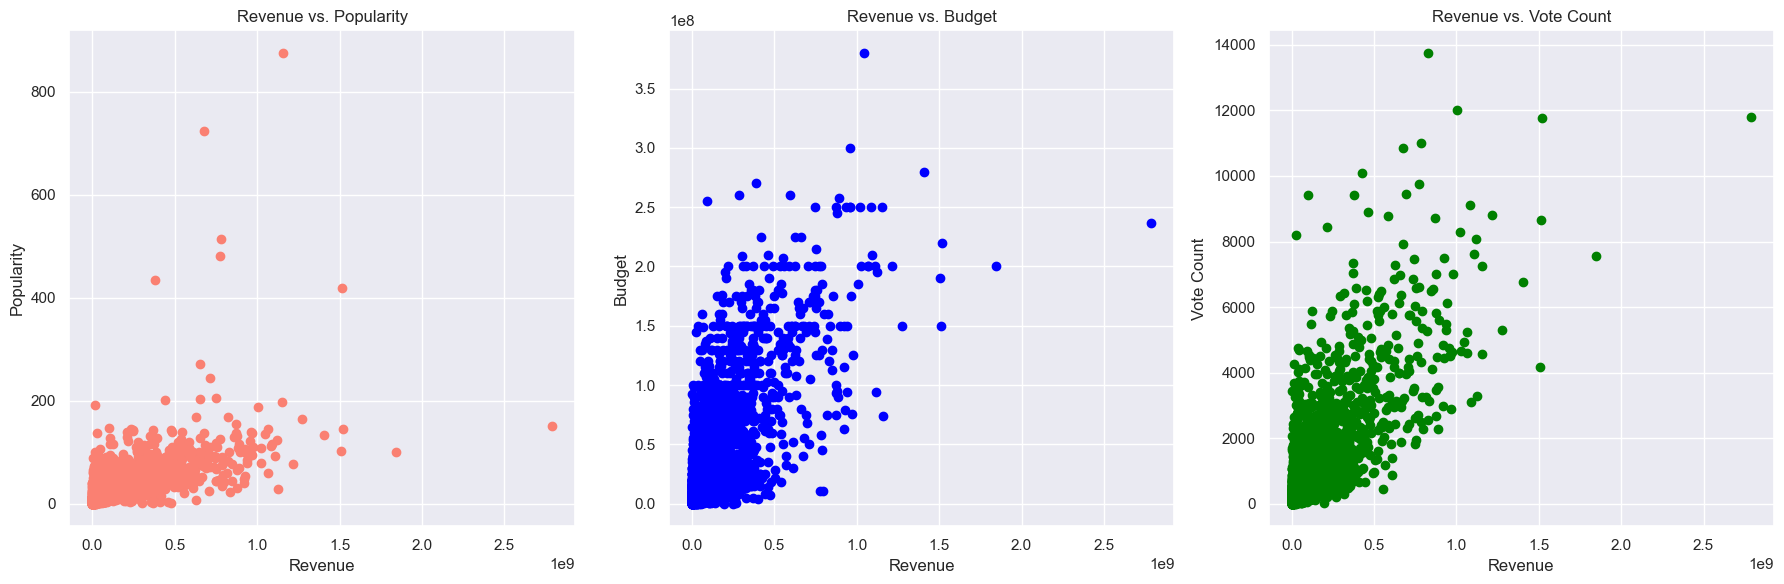

In [191]:
# Gráfiquemos las 3 variables vs. revenue
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: 'revenue' vs. 'popularity'
axes[0].scatter(df_movies['revenue'], df_movies['popularity'], color='salmon')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Popularity')
axes[0].set_title('Revenue vs. Popularity')

# Gráfico 2: 'revenue' vs. 'budget'
axes[1].scatter(df_movies['revenue'], df_movies['budget'], color='blue')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Budget')
axes[1].set_title('Revenue vs. Budget')

# Gráfico 3: 'revenue' vs. 'vote_count'
axes[2].scatter(df_movies['revenue'], df_movies['vote_count'], color='green')
axes[2].set_xlabel('Revenue')
axes[2].set_ylabel('Vote Count')
axes[2].set_title('Revenue vs. Vote Count')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

*Efectivamente como la correlación marca tenemos una tendencia en cada par de variables*

In [192]:
# Interpolación lineal
interpolar = df_movies[['revenue','popularity','budget','vote_count']]
df_interpolada = interpolar.interpolate(method="linear")
prefijo = "IN_lineal_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_lineal_revenue,IN_lineal_popularity,IN_lineal_budget,IN_lineal_vote_count
id,,,,
19995,2787965087.00,150.44,237000000.00,11800.00
285,961000000.00,139.08,300000000.00,4500.00
206647,880674609.00,107.38,245000000.00,4466.00
49026,1084939099.00,112.31,250000000.00,9106.00
49529,284139100.00,43.93,260000000.00,2124.00
...,...,...,...,...
9367,2040920.00,14.27,220000.00,238.00
72766,2040920.00,0.64,9000.00,5.00
231617,2040920.00,1.44,9000.00,6.00


In [193]:
df_interpolada_2 = pd.concat([df_interpolada['IN_lineal_revenue'], interpolar], axis=1)
df_interpolada_2[df_interpolada_2['revenue'].isnull()]

,IN_lineal_revenue,revenue,popularity,budget,vote_count
id,,,,,
79698,430803520.50,NaN,2.42,27000000.00,34.00
7978,484962358.00,NaN,21.21,150000000.00,549.00
10588,217474370.50,NaN,18.25,NaN,366.00
10214,113769734.50,NaN,17.82,84000000.00,338.00
10357,117253773.50,NaN,19.84,90000000.00,376.00
...,...,...,...,...,...
67238,1232840.00,NaN,0.02,NaN,2.00
72766,2040920.00,NaN,0.64,9000.00,5.00
231617,2040920.00,NaN,1.44,NaN,6.00


In [194]:
# Interpolación Polinomial
interpolar = df_movies[['revenue','popularity','budget','vote_count']]
df_interpolada = interpolar.interpolate(method="polynomial",order = 2)
prefijo = "IN_polin_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_polin_revenue,IN_polin_popularity,IN_polin_budget,IN_polin_vote_count
id,,,,
19995,2787965087.00,150.44,237000000.00,11800.00
285,961000000.00,139.08,300000000.00,4500.00
206647,880674609.00,107.38,245000000.00,4466.00
49026,1084939099.00,112.31,250000000.00,9106.00
49529,284139100.00,43.93,260000000.00,2124.00
...,...,...,...,...
9367,2040920.00,14.27,220000.00,238.00
72766,-25102739.42,0.64,9000.00,5.00
231617,128370828.02,1.44,25096077.46,6.00


*La interpolación polinomial no has a devuelto valores negativos que no son aceptables para este campo, por lo que desistimos de continuar con su uso para el análisis*

In [195]:
#Interpolación nearest
interpolar = df_movies[['revenue','popularity','budget','vote_count']]
df_interpolada = interpolar.interpolate(method="nearest")
prefijo = "IN_nearest_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_nearest_revenue,IN_nearest_popularity,IN_nearest_budget,IN_nearest_vote_count
id,,,,
19995,2787965087.00,150.44,237000000.00,11800.00
285,961000000.00,139.08,300000000.00,4500.00
206647,880674609.00,107.38,245000000.00,4466.00
49026,1084939099.00,112.31,250000000.00,9106.00
49529,284139100.00,43.93,260000000.00,2124.00
...,...,...,...,...
9367,2040920.00,14.27,220000.00,238.00
72766,63327201.00,0.64,9000.00,5.00
231617,5483299.00,1.44,5500000.00,6.00


In [196]:
df_interpolada_4 = pd.concat([df_interpolada['IN_nearest_revenue'], interpolar], axis=1)
df_interpolada_4[df_interpolada_4['revenue'].isnull()]

,IN_nearest_revenue,revenue,popularity,budget,vote_count
id,,,,,
79698,9627492.00,NaN,2.42,27000000.00,34.00
7978,73276047.00,NaN,21.21,150000000.00,549.00
10588,61347797.00,NaN,18.25,NaN,366.00
10214,58000000.00,NaN,17.82,84000000.00,338.00
10357,42105111.00,NaN,19.84,90000000.00,376.00
...,...,...,...,...,...
67238,96070507.00,NaN,0.02,NaN,2.00
72766,63327201.00,NaN,0.64,9000.00,5.00
231617,5483299.00,NaN,1.44,NaN,6.00


In [197]:
# Junto toda la interpolacion
df_movies['IN_lineal_revenue'] = df_interpolada_2['IN_lineal_revenue']
df_movies['IN_nearest_revenue'] = df_interpolada_4['IN_nearest_revenue']
df_movies['revenue_Vacio'] = df_movies['revenue'].isnull()

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Revenue vs Vote_Count')

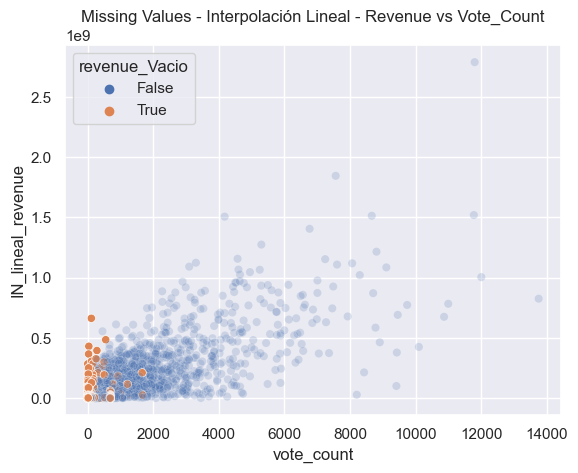

In [198]:
# Gráfiquemos para ver como quedarian los datos a reemplazar
valores_alpha = np.where(df_movies['revenue_Vacio'] == True,1,0.2)
valores_tamanio = np.where(df_movies['revenue_Vacio'] == True,3,1)
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'vote_count',
                y = 'IN_lineal_revenue',
                hue = 'revenue_Vacio',
                alpha = valores_alpha)
plt.title('Missing Values - Interpolación Lineal - Revenue vs Vote_Count')

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Revenue vs Budget')

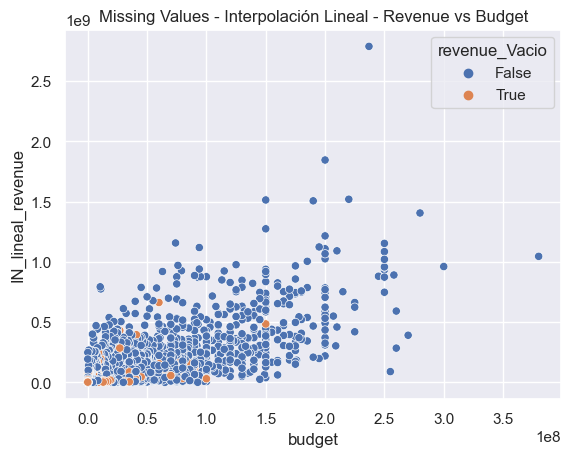

In [199]:
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'budget',
                y = 'IN_lineal_revenue',
                hue = 'revenue_Vacio')
plt.title('Missing Values - Interpolación Lineal - Revenue vs Budget')

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Revenue vs Popularity')

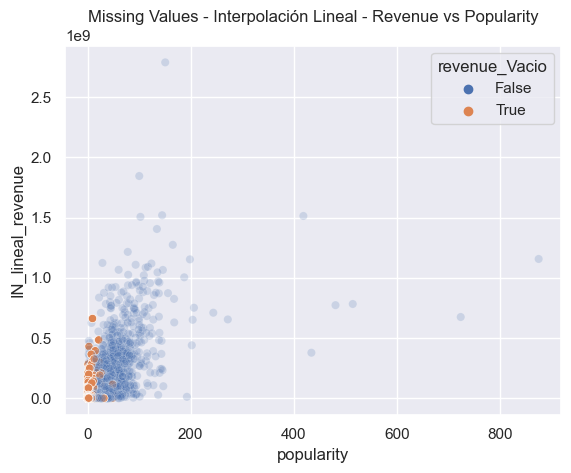

In [200]:
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'popularity',
                y = 'IN_lineal_revenue',
                hue = 'revenue_Vacio',
                alpha = valores_alpha)
plt.title('Missing Values - Interpolación Lineal - Revenue vs Popularity')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Revenue vs Vote_Count')

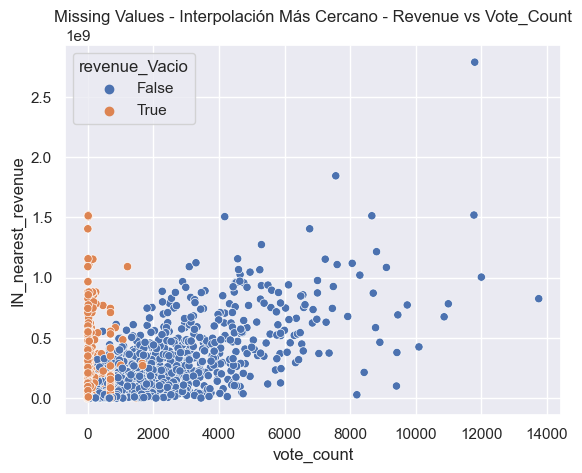

In [201]:
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'vote_count',
                y = 'IN_nearest_revenue',
                hue = 'revenue_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Revenue vs Vote_Count')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Revenue vs Popularity')

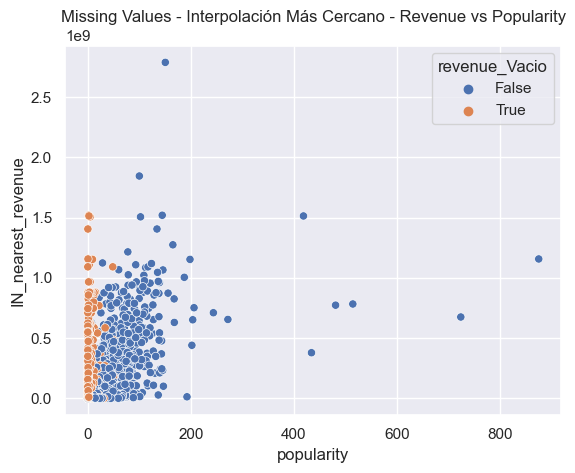

In [202]:
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'popularity',
                y = 'IN_nearest_revenue',
                hue = 'revenue_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Revenue vs Popularity')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Revenue vs Budget')

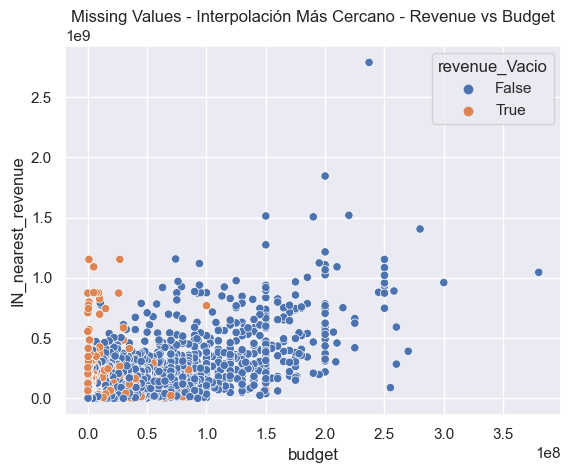

In [203]:
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'budget',
                y = 'IN_nearest_revenue',
                hue = 'revenue_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Revenue vs Budget')

*De los gráficos determinamos que el la interpolación lineal es la mejor candidata a corregir nuestros valores en cero para revenue, por lo que reemplazaremos revenue por IN_lineal_revenue para continuar nuestro análisis*

## Interpolación para *budget*

In [204]:
#Veamos la correlación con Budget
correlaciones_budget = abs(df_movies[['budget','revenue','popularity','runtime','vote_average','vote_count']].corr(method='pearson')['budget'])
df_movies[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr(method='pearson')['budget'][(correlaciones_budget < 1) & (correlaciones_budget > 0.35)].sort_values(ascending=False)

revenue      0.71
vote_count   0.55
popularity   0.46
Name: budget, dtype: float64

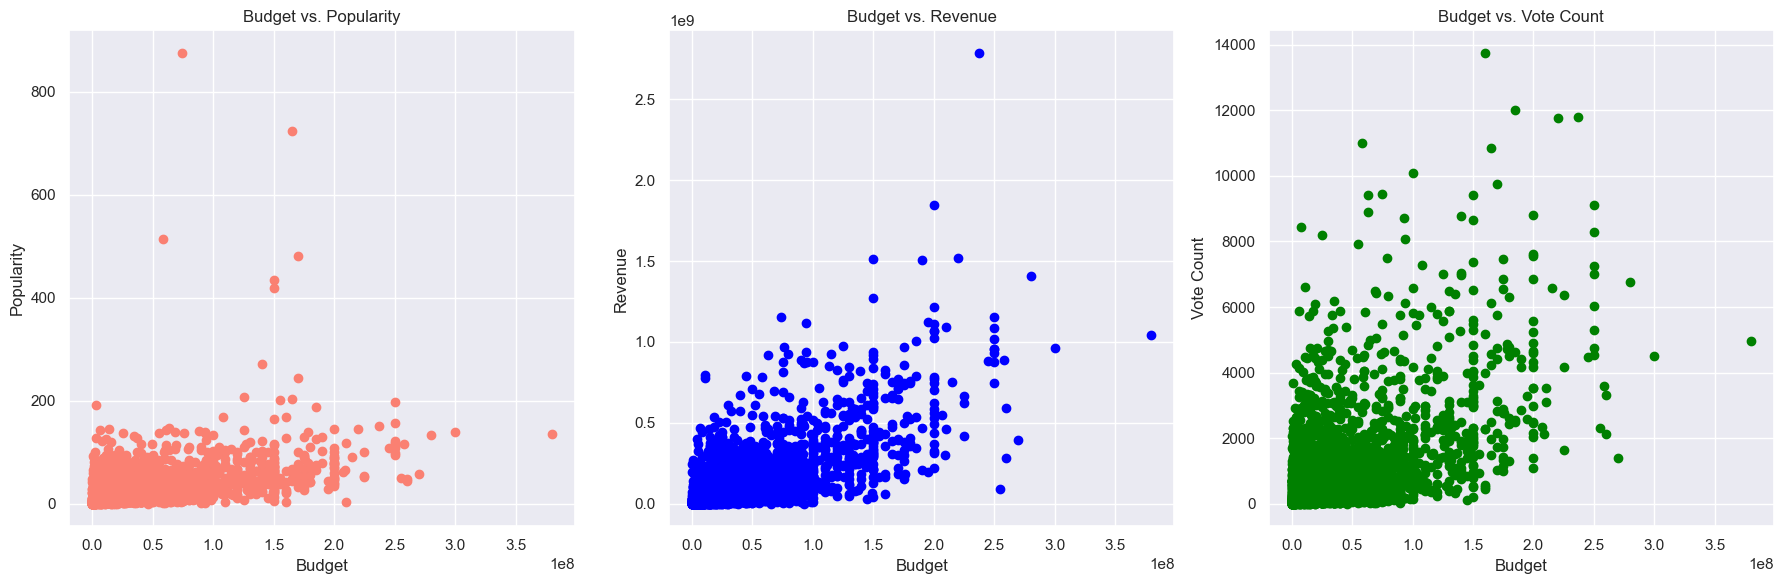

In [205]:
# Grafiquemos las variables con mejor correlación
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: 'budget' vs. 'popularity'
axes[0].scatter(df_movies['budget'], df_movies['popularity'], color='salmon')
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Popularity')
axes[0].set_title('Budget vs. Popularity')

# Gráfico 2: 'budget' vs. 'revenue'
axes[1].scatter(df_movies['budget'], df_movies['revenue'], color='blue')
axes[1].set_xlabel('Budget')
axes[1].set_ylabel('Revenue')
axes[1].set_title('Budget vs. Revenue')

# Gráfico 3: 'budget' vs. 'vote_count'
axes[2].scatter(df_movies['budget'], df_movies['vote_count'], color='green')
axes[2].set_xlabel('Budget')
axes[2].set_ylabel('Vote Count')
axes[2].set_title('Budget vs. Vote Count')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

*Nuevamente se ve una tendencia en cada gráfico, veamos la interpolación para esta variable*

In [206]:
# Interpolación lineal
interpolar = df_movies[['budget','popularity','IN_lineal_revenue','vote_count']]
df_interpolada = interpolar.interpolate(method="linear")
prefijo = "IN_lineal_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_lineal_budget,IN_lineal_popularity,IN_lineal_IN_lineal_revenue,IN_lineal_vote_count
id,,,,
19995,237000000.00,150.44,2787965087.00,11800.00
285,300000000.00,139.08,961000000.00,4500.00
206647,245000000.00,107.38,880674609.00,4466.00
49026,250000000.00,112.31,1084939099.00,9106.00
49529,260000000.00,43.93,284139100.00,2124.00
...,...,...,...,...
9367,220000.00,14.27,2040920.00,238.00
72766,9000.00,0.64,2040920.00,5.00
231617,9000.00,1.44,2040920.00,6.00


In [207]:
df_interpolada_5 = pd.concat([df_interpolada['IN_lineal_budget'], interpolar], axis=1)
df_interpolada_5[df_interpolada_5['budget'].isnull()]

,IN_lineal_budget,budget,popularity,IN_lineal_revenue,vote_count
id,,,,,
10588,113500000.00,NaN,18.25,217474370.50,366.00
77953,91000000.00,NaN,16.46,104907746.00,578.00
258509,97500000.00,NaN,27.87,233755553.00,428.00
51052,87500000.00,NaN,19.84,150704196.00,333.00
16858,85000000.00,NaN,5.16,37823676.00,85.00
...,...,...,...,...,...
124606,10250.00,NaN,0.92,343320.00,1.00
67238,113500.00,NaN,0.02,1232840.00,2.00
231617,9000.00,NaN,1.44,2040920.00,6.00


In [208]:
# Interpolación Polinomial
interpolar = df_movies[['budget','popularity','IN_lineal_revenue','vote_count']]
df_interpolada = interpolar.interpolate(method="polynomial",order = 2)
prefijo = "IN_polin_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_polin_budget,IN_polin_popularity,IN_polin_IN_lineal_revenue,IN_polin_vote_count
id,,,,
19995,237000000.00,150.44,2787965087.00,11800.00
285,300000000.00,139.08,961000000.00,4500.00
206647,245000000.00,107.38,880674609.00,4466.00
49026,250000000.00,112.31,1084939099.00,9106.00
49529,260000000.00,43.93,284139100.00,2124.00
...,...,...,...,...
9367,220000.00,14.27,2040920.00,238.00
72766,9000.00,0.64,2040920.00,5.00
231617,25096077.46,1.44,2040920.00,6.00


In [209]:
df_interpolada_6 = pd.concat([df_interpolada['IN_polin_budget'], interpolar], axis=1)
df_interpolada_6[df_interpolada_6['budget'].isnull()]

,IN_polin_budget,budget,popularity,IN_lineal_revenue,vote_count
id,,,,,
10588,52961575.55,NaN,18.25,217474370.50,366.00
77953,-84195724.61,NaN,16.46,104907746.00,578.00
258509,187586862.65,NaN,27.87,233755553.00,428.00
51052,-8664639.33,NaN,19.84,150704196.00,333.00
16858,45595738.50,NaN,5.16,37823676.00,85.00
...,...,...,...,...,...
124606,39300271.27,NaN,0.92,343320.00,1.00
67238,31075532.55,NaN,0.02,1232840.00,2.00
231617,25096077.46,NaN,1.44,2040920.00,6.00


*Nuevamente la aparición de negativos hace que desestimemos esta tipo de interpolación para el campo budget*

In [210]:
interpolar = df_movies[['budget','popularity','IN_lineal_revenue','vote_count']]
df_interpolada = interpolar.interpolate(method="nearest")
prefijo = "IN_nearest_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_nearest_budget,IN_nearest_popularity,IN_nearest_IN_lineal_revenue,IN_nearest_vote_count
id,,,,
19995,237000000.00,150.44,2787965087.00,11800.00
285,300000000.00,139.08,961000000.00,4500.00
206647,245000000.00,107.38,880674609.00,4466.00
49026,250000000.00,112.31,1084939099.00,9106.00
49529,260000000.00,43.93,284139100.00,2124.00
...,...,...,...,...
9367,220000.00,14.27,2040920.00,238.00
72766,9000.00,0.64,2040920.00,5.00
231617,5500000.00,1.44,2040920.00,6.00


In [211]:
df_interpolada_7 = pd.concat([df_interpolada['IN_nearest_budget'], interpolar], axis=1)
df_interpolada_7[df_interpolada_7['budget'].isnull()]

,IN_nearest_budget,budget,popularity,IN_lineal_revenue,vote_count
id,,,,,
10588,60000000.00,NaN,18.25,217474370.50,366.00
77953,80000000.00,NaN,16.46,104907746.00,578.00
258509,180000000.00,NaN,27.87,233755553.00,428.00
51052,30000000.00,NaN,19.84,150704196.00,333.00
16858,70000000.00,NaN,5.16,37823676.00,85.00
...,...,...,...,...,...
124606,30000000.00,NaN,0.92,343320.00,1.00
67238,2902660.00,NaN,0.02,1232840.00,2.00
231617,5500000.00,NaN,1.44,2040920.00,6.00


In [212]:
# Junto toda la interpolacion
df_movies['IN_lineal_budget'] = df_interpolada_5['IN_lineal_budget']
df_movies['IN_nearest_budget'] = df_interpolada_7['IN_nearest_budget']
df_movies['budget_Vacio'] = df_movies['budget'].isnull()

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Budget vs Vote_Count')

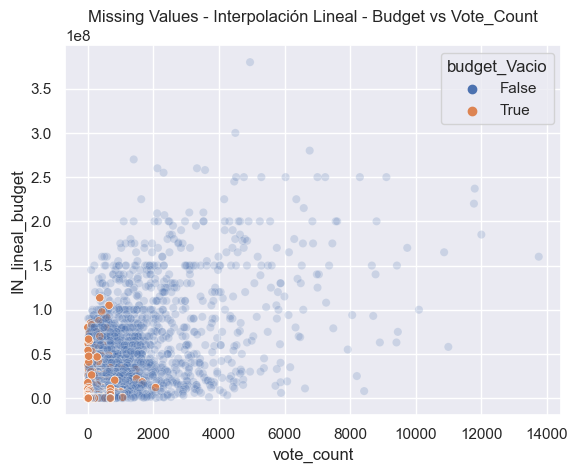

In [213]:
# Grafiquemos para ver la interpolación 
valores_alpha = np.where(df_movies['budget_Vacio'] == True,1,0.2)
valores_tamanio = np.where(df_movies['budget_Vacio'] == True,3,1)
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'vote_count',
                y = 'IN_lineal_budget',
                hue = 'budget_Vacio',
                alpha = valores_alpha)
plt.title('Missing Values - Interpolación Lineal - Budget vs Vote_Count')

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Budget vs Revenue')

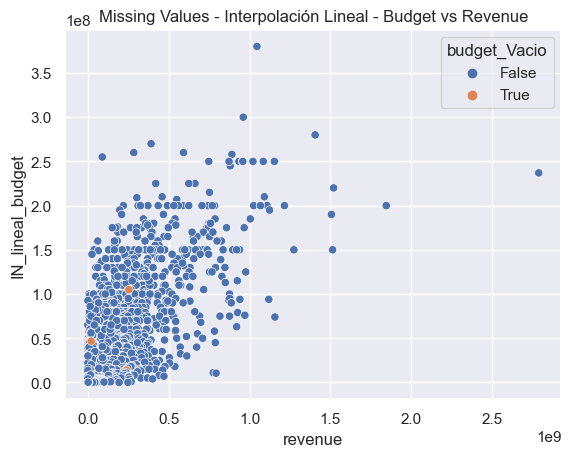

In [214]:
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'revenue',
                y = 'IN_lineal_budget',
                hue = 'budget_Vacio')
plt.title('Missing Values - Interpolación Lineal - Budget vs Revenue')

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Budget vs Popularity')

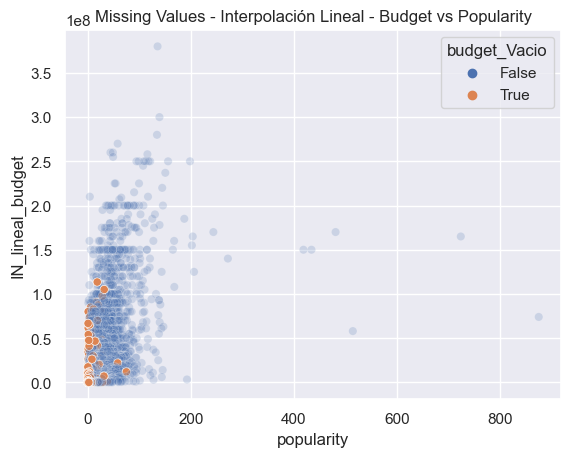

In [215]:
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'popularity',
                y = 'IN_lineal_budget',
                hue = 'budget_Vacio',
                alpha = valores_alpha)
plt.title('Missing Values - Interpolación Lineal - Budget vs Popularity')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Budget vs Vote_Count')

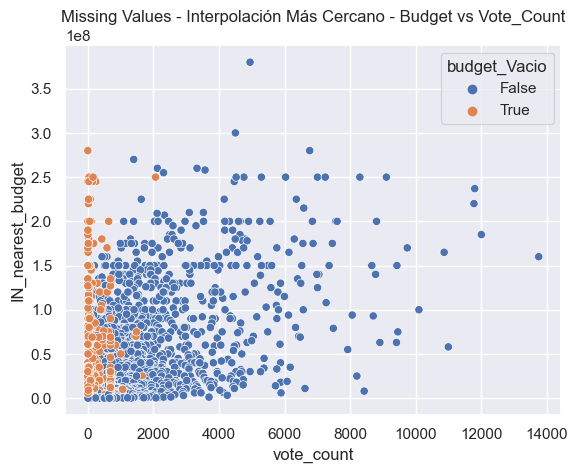

In [216]:
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'vote_count',
                y = 'IN_nearest_budget',
                hue = 'budget_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Budget vs Vote_Count')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Budget vs Popularity')

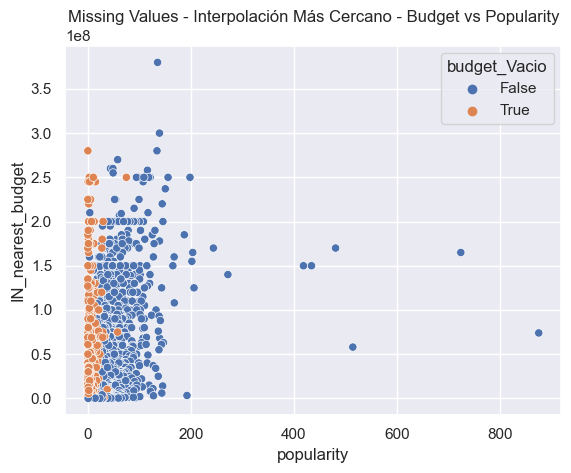

In [217]:
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'popularity',
                y = 'IN_nearest_budget',
                hue = 'budget_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Budget vs Popularity')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Budget vs Revenue')

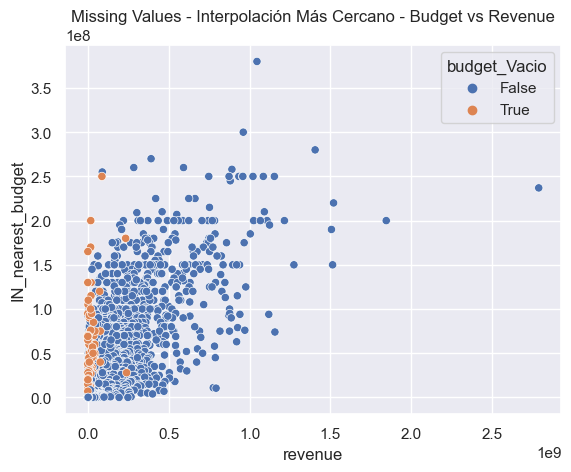

In [218]:
plt.figure()
sns.scatterplot(data = df_movies,
                x = 'revenue',
                y = 'IN_nearest_budget',
                hue = 'budget_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Budget vs Revenue')

*Nuevamente de este último análisis determinamos usar la interpolación lineal para la variable budget*

## Nuevas Variables

In [219]:
# A la anterior variable creada weighted_average agregamos dos nuevas

# Nueva variable season o temporada, en base a la fecha de lanzamiento de la pelicula determinamos a que temporada pertenece (temporadas USA)
def obtener_temporada(date):
    if (date.month == 3 and date.day >= 20) or (date.month in [4, 5]) or (date.month == 6 and date.day < 21):
        return 'spring'
    elif (date.month == 6 and date.day >= 21) or (date.month in [7, 8]) or (date.month == 9 and date.day < 22):
        return 'summer'
    elif (date.month == 9 and date.day >= 22) or (date.month in [10, 11]) or (date.month == 12 and date.day < 21):
        return 'autumn'
    else:
        return 'winter'

# Aplicar la función a la columna 'release_date' para obtener la estación del año
df_movies['temporada'] = df_movies['release_date'].apply(obtener_temporada)

def obtener_dia_semana(fecha):
    # No es necesario convertir la fecha, ya que se asume que es un objeto de fecha
    dia_semana = fecha.strftime('%A')
    
    return dia_semana

df_movies['dia_semana'] = df_movies['release_date'].apply(obtener_dia_semana)

def obtener_mes(fecha):
    # No es necesario convertir la fecha, ya que se asume que es un objeto de fecha
    mes = fecha.strftime('%B')
    
    return mes

df_movies['mes'] = df_movies['release_date'].apply(obtener_mes)

df_movies[['original_title','temporada','dia_semana','mes']].head()

,original_title,temporada,dia_semana,mes
id,,,,
19995,Avatar,autumn,Thursday,December
285,Pirates of the Caribbean: At World's End,spring,Saturday,May
206647,Spectre,autumn,Monday,October
49026,The Dark Knight Rises,summer,Monday,July
49529,John Carter,winter,Wednesday,March


## Limpieza de datos con textos en Json

In [220]:
# Filtramos para quedarnos con la principal compañia productora, principal pais y el director
def convert(texto):
    lista=[]
    contador=0
    for i in ast.literal_eval(texto):
        if contador<1:
            lista.append(i['name'])
        contador+=1
    return lista

df_movies['production_companies'] = df_movies['production_companies'].apply(convert)
df_movies['production_countries'] = df_movies['production_countries'].apply(convert)
df_movies['crew'] = df_movies['crew'].apply(convert)
df_movies['main_genre'] = df_movies['genres'].apply(convert)

# Pasemos los campos con datos de textos en formato Json a lista
def convert(texto):
    lista=[]
    for i in ast.literal_eval(texto):
        lista.append(i['name'])
    return lista

df_movies['genres'] = df_movies['genres'].apply(convert)
df_movies['keywords'] = df_movies['keywords'].apply(convert)
df_movies['spoken_languages'] = df_movies['spoken_languages'].apply(convert)

# Nos quedamos solo con los 3 principales actores de la pelicula
def convert(texto):
    lista=[]
    contador=0
    for i in ast.literal_eval(texto):
        if contador<3:
            lista.append(i['name'])
        contador+=1
    return lista

df_movies['cast'] = df_movies['cast'].apply(convert)

#Cambiamos el nombre de estas ultimas 3 columnas 
df_movies.rename(columns={'production_companies': 'production_companie'}, inplace=True)
df_movies.rename(columns={'production_countries': 'production_countrie'}, inplace=True)
df_movies.rename(columns={'crew': 'director'}, inplace=True)

df_movies[['genres','keywords','spoken_languages','cast','production_companie','production_countrie','director']].head()

,genres,keywords,spoken_languages,cast,production_companie,production_countrie,director
id,,,,,,,
19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[English, Español]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[Ingenious Film Partners],[United States of America],[Stephen E. Rivkin]
285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",[English],"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Walt Disney Pictures],[United States of America],[Dariusz Wolski]
206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Français, English, Español, Italiano, Deutsch]","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Columbia Pictures],[United Kingdom],[Thomas Newman]
49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",[English],"[Christian Bale, Michael Caine, Gary Oldman]",[Legendary Pictures],[United States of America],[Hans Zimmer]
49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[English],"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Walt Disney Pictures],[United States of America],[Andrew Stanton]


# Variable Target: Popularity
La variable objetivo es de tipo **numérica**, por lo que el modelo a desarrollar será de tipo **Aprendizaje Supervisado: Regresión**. 
<br> <br/>
A continuación se presentarán algunas estadísticas para entender el comportamiento, formato y distribución de esta variable. 

In [221]:
# Algunas estadísticas
variable_target = df_movies['popularity']
variable_target.describe().round(2)

count   4799.00
mean      21.51
std       31.82
min        0.00
25%        4.69
50%       12.93
75%       28.35
max      875.58
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Distribución de Popularity')

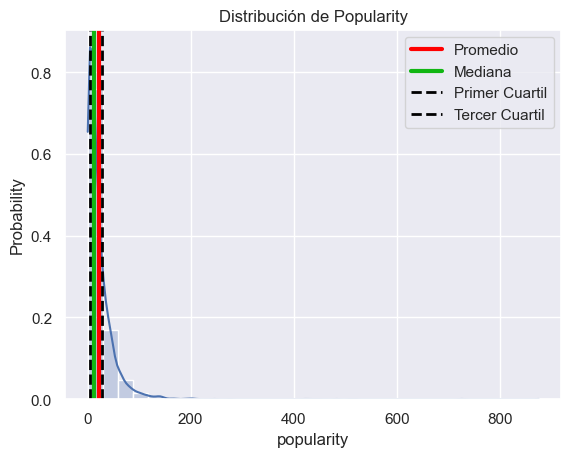

In [222]:
# Histograma variable target 
# Primero calculo algunas medidas que quiero presentar 
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df_movies,
             x = 'popularity',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de Popularity')

## Análisis Variable Target: Popularity
Se puede observar que la variable tiene una distribución asimétrica positiva (la mediana es menor que el promedio), concentrando gran porción de los registros en valores bajos, y observando muy pocos registros en valores altos.  
<br> <br/>
Esto indicaría que hay muy pocas películas con indices de popularidad extremadamente altos. 
<br> <br/>
Al tratar con una variable target de este tipo de distribución, una buena prácica suele ser intentar predecir el logaritmo de la variable, para suavizar un poco la curva de valores posibles. 
<br> <br/>
A continuación se presentará el histograma del logaritmo de la variable target. 

Text(0.5, 1.0, 'Distribución de Popularity transformado a Logaritmo')

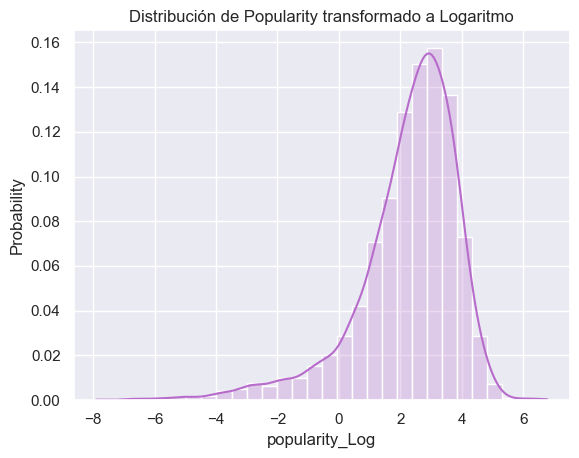

In [223]:
# Primero genero la variable logaritmica 
df_movies['popularity_Log'] = np.log(df_movies['popularity'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df_movies,
             x = 'popularity_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de Popularity transformado a Logaritmo')

# Correlación 
Lo próximo que analizaremos es la correlación entre cada variable disponible, y la variable target. 
 <br> <br/>
 Algo a tener en cuenta es que este análisis, en principio, es válido únicamente para las variables numéricas. Dado que el dataset tiene muchas variables disponibles, haremos este análisis para detectar cuáles son las variables numéricas más relacionadas con la variable target, para detenernos en el análisis de algunas de ellas. 

In [224]:
# Calculo matriz de correlación 
matriz_correlacion = df_movies[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 
       'IN_lineal_revenue', 'IN_nearest_revenue', 'IN_lineal_budget', 'IN_nearest_budget', 'popularity_Log']].corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['popularity_Log']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['popularity', 'popularity_Log']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

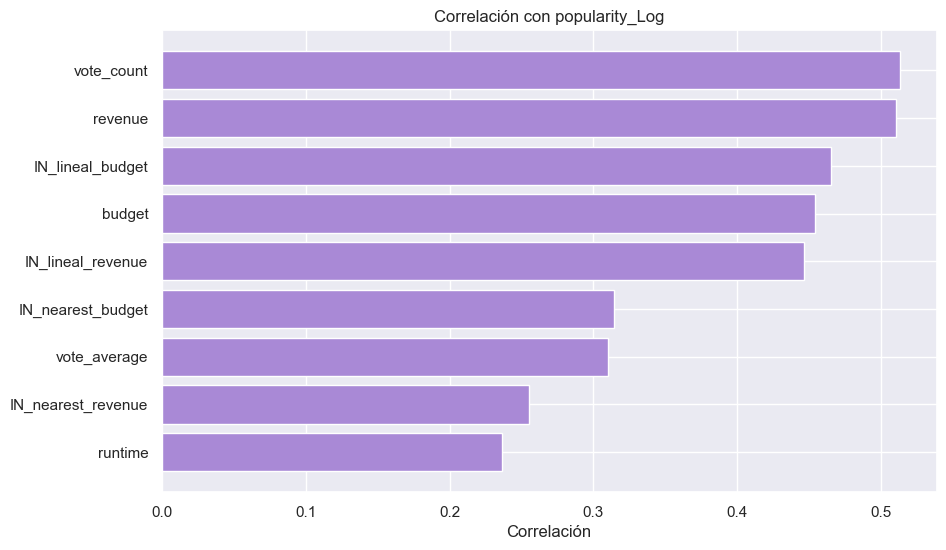

In [225]:
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con popularity_Log')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

## IN_lineal_budget / budget: Análisis Univariado 
Lo que observamos en este caso es que la mayor parte de las casas fueron calificadas entre 4 y 8 puntos (94% de las observaciones). 

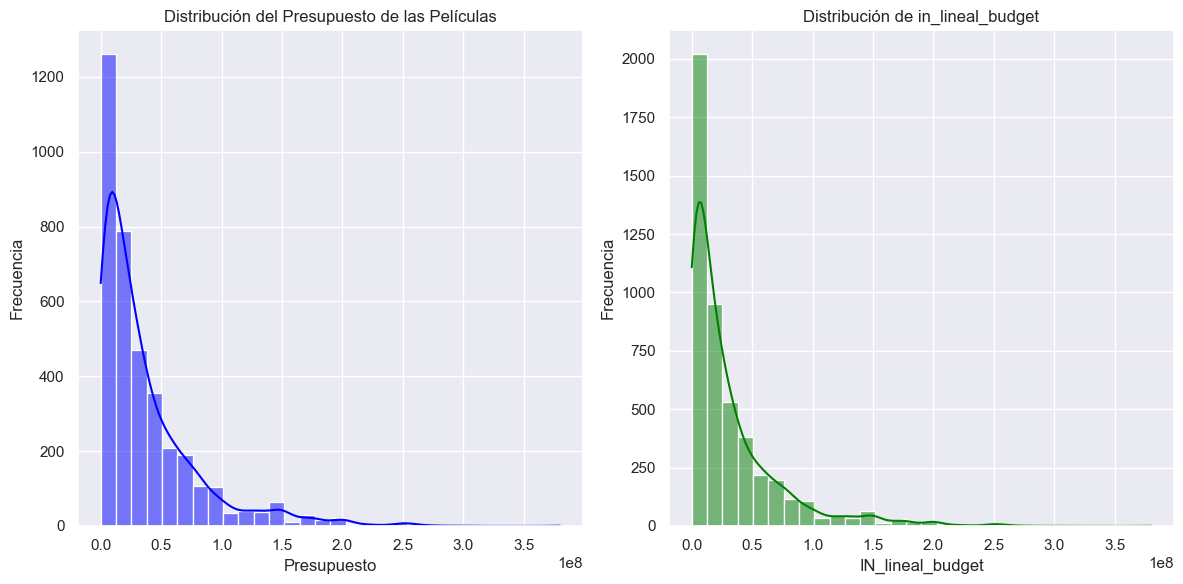

In [226]:
# Crea un lienzo de subgráficos con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Distribución del presupuesto
sns.histplot(data=df_movies, x='budget', bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_xlabel('Presupuesto')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Presupuesto de las Películas')

# Gráfico 2: Distribución de in_lineal_budget
sns.histplot(data=df_movies, x='IN_lineal_budget', bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_xlabel('IN_lineal_budget')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de in_lineal_budget')

plt.tight_layout()
plt.show()



In [227]:
conteo = df_movies['budget'].value_counts() 
conteo_maspresentes = ((df_movies['budget'] >= 0) & (df_movies['budget'] <= 100000000)).sum()
print('Porcentaje con budget entre 0 y 100.000.000:')
print(str(round(conteo_maspresentes.sum()/conteo.sum(),2)*100) + '%')

Porcentaje con budget entre 0 y 100.000.000:
93.0%


In [228]:
conteo_maspresentes = ((df_movies['budget'] >= 0) & (df_movies['budget'] <= 10000000)).sum()
print('Porcentaje con budget entre 0 y 10.000.000:')
print(str(round(conteo_maspresentes.sum()/conteo.sum(),2)*100) + '%')

Porcentaje con budget entre 0 y 10.000.000:
30.0%


In [229]:
conteo_maspresentes = ((df_movies['budget'] >= 0) & (df_movies['budget'] <= 1000000)).sum()
print('Porcentaje con budget entre 0 y 1.000.000:')
print(str(round(conteo_maspresentes.sum()/conteo.sum(),2)*100) + '%')

Porcentaje con budget entre 0 y 1.000.000:
6.0%


In [230]:
conteo = df_movies['IN_lineal_budget'].value_counts() 
conteo_maspresentes = ((df_movies['IN_lineal_budget'] >= 0) & (df_movies['IN_lineal_budget'] <= 100000000)).sum()
print('Porcentaje con IN_lineal_budget entre 0 y 100.000.000:')
print(str(round(conteo_maspresentes.sum()/conteo.sum(),2)*100) + '%')

Porcentaje con IN_lineal_budget entre 0 y 100.000.000:
94.0%


In [231]:
conteo = df_movies['IN_lineal_budget'].value_counts() 
conteo_maspresentes = ((df_movies['IN_lineal_budget'] >= 0) & (df_movies['IN_lineal_budget'] <= 10000000)).sum()
print('Porcentaje con IN_lineal_budget entre 0 y 10.000.000:')
print(str(round(conteo_maspresentes.sum()/conteo.sum(),2)*100) + '%')

Porcentaje con IN_lineal_budget entre 0 y 10.000.000:
38.0%


In [232]:
conteo = df_movies['IN_lineal_budget'].value_counts() 
conteo_maspresentes = ((df_movies['IN_lineal_budget'] >= 0) & (df_movies['IN_lineal_budget'] <= 1000000)).sum()
print('Porcentaje con IN_lineal_budget entre 0 y 1.000.000:')
print(str(round(conteo_maspresentes.sum()/conteo.sum(),2)*100) + '%')

Porcentaje con IN_lineal_budget entre 0 y 1.000.000:
10.0%


In [233]:
df_movies.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companie', 'production_countrie',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'cast', 'director',
       'website', 'IN_lineal_revenue', 'IN_nearest_revenue', 'revenue_Vacio',
       'IN_lineal_budget', 'IN_nearest_budget', 'budget_Vacio', 'temporada',
       'dia_semana', 'mes', 'main_genre', 'popularity_Log'],
      dtype='object')

## Budget / IN_lineal_budget: Análisis Bivariado 
Lo próximo que haremos es ver cómo es la relación de esta variable con nuestro target. 
Veamoslo en un gráfico. 

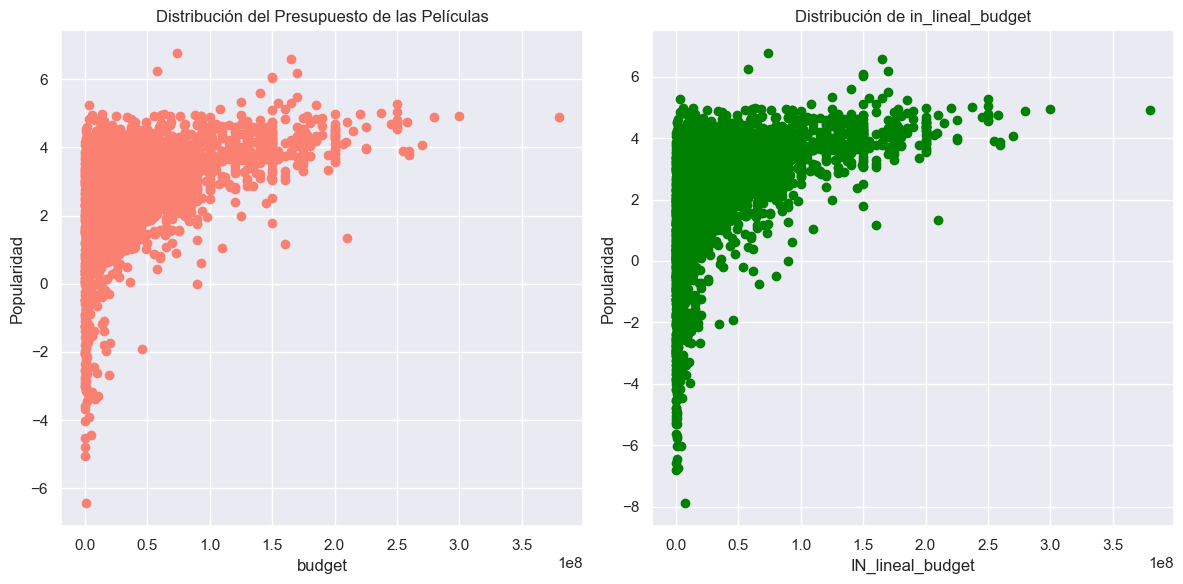

In [234]:
# Crea un lienzo de subgráficos con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Distribución del presupuesto
axes[0].scatter(df_movies['budget'], df_movies['popularity_Log'], color='salmon')
axes[0].set_xlabel('budget')
axes[0].set_ylabel('Popularidad')
axes[0].set_title('Distribución del Presupuesto de las Películas')

# Gráfico 2: Distribución de in_lineal_budget
axes[1].scatter(df_movies['IN_lineal_budget'], df_movies['popularity_Log'], color='green')
axes[1].set_xlabel('IN_lineal_budget')
axes[1].set_ylabel('Popularidad')
axes[1].set_title('Distribución de in_lineal_budget')

plt.tight_layout()
plt.show()

In [241]:
df_movies = df_movies.explode('main_genre')
df_popularidad_genero = df_movies.groupby('main_genre')['popularity'].mean().reset_index()
df_popularidad_genero.columns = ['main_genre', 'popularidad_promedio']
df_movies = df_movies.merge(df_popularidad_genero, on='main_genre', how='left')

In [244]:
df_movies.head()

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companie,production_countrie,release_date,...,IN_lineal_budget,IN_nearest_budget,budget_Vacio,temporada,dia_semana,mes,main_genre,popularity_Log,popularidad_promedio_x,popularidad_promedio_y
0,237000000.00,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,[Ingenious Film Partners],[United States of America],2009-12-10,...,237000000.00,237000000.00,False,autumn,Thursday,December,Action,5.01,28.48,28.48
1,300000000.00,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,[Walt Disney Pictures],[United States of America],2007-05-19,...,300000000.00,300000000.00,False,spring,Saturday,May,Adventure,4.94,39.06,39.06
2,245000000.00,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,[Columbia Pictures],[United Kingdom],2015-10-26,...,245000000.00,245000000.00,False,autumn,Monday,October,Action,4.68,28.48,28.48
3,250000000.00,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31,[Legendary Pictures],[United States of America],2012-07-16,...,250000000.00,250000000.00,False,summer,Monday,July,Action,4.72,28.48,28.48
4,260000000.00,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.93,[Walt Disney Pictures],[United States of America],2012-03-07,...,260000000.00,260000000.00,False,winter,Wednesday,March,Action,3.78,28.48,28.48


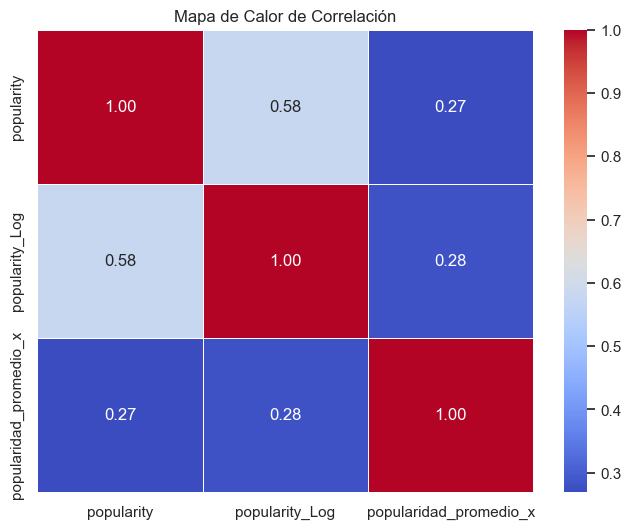

In [251]:
correlacion = df_movies[['popularity', 'popularity_Log', 'popularidad_promedio_x']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

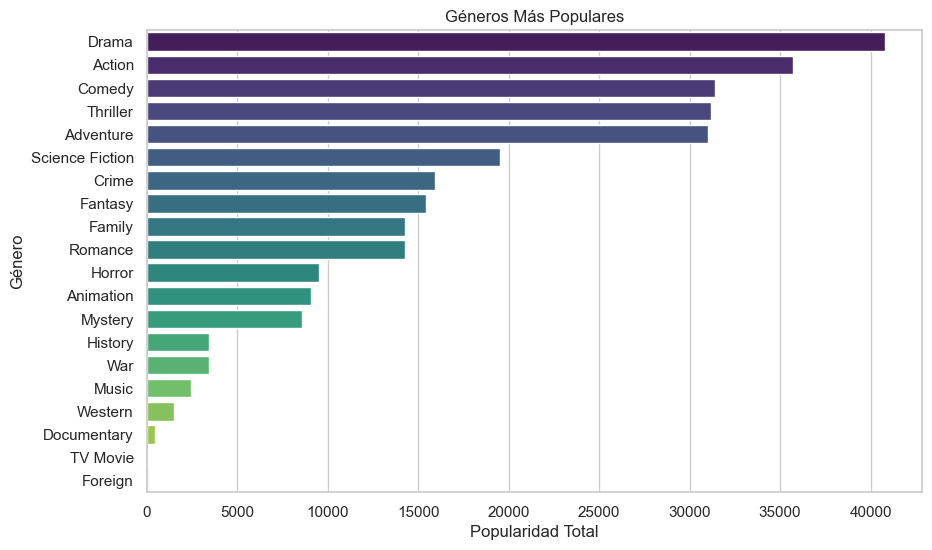

In [ ]:
df_movies = df_movies.explode('genres')
popularidad_generos = df_movies.groupby('genres')['popularity'].sum().reset_index()
popularidad_generos = popularidad_generos.sort_values(by='popularity', ascending=False)

# Configura el estilo de seaborn
sns.set(style="whitegrid")

# Crea un gráfico de barras horizontales para mostrar los géneros más populares
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='genres', data=popularidad_generos, palette='viridis')
plt.xlabel('Popularidad Total')
plt.ylabel('Género')
plt.title('Géneros Más Populares')
plt.show()

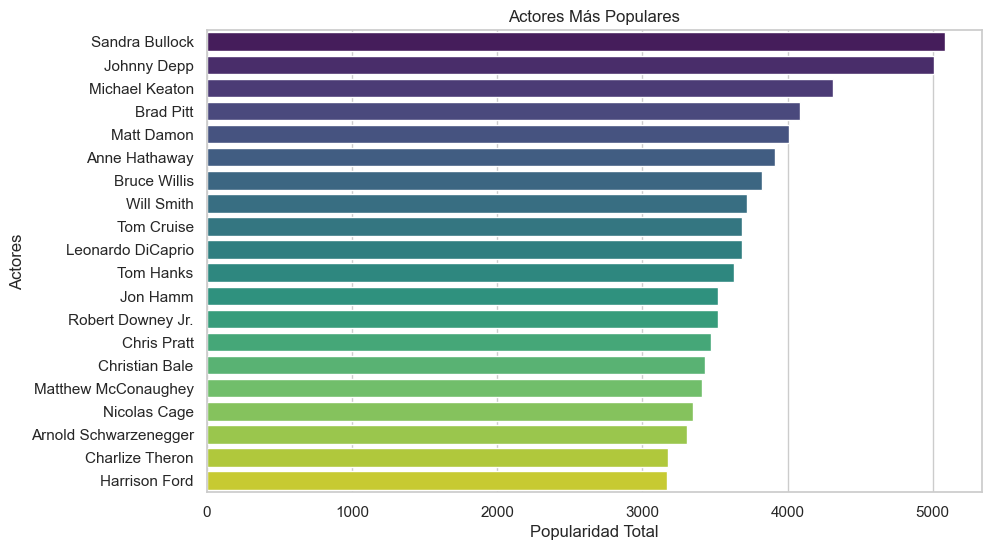

In [ ]:
df_movies = df_movies.explode('cast')
popularidad_actores = df_movies.groupby('cast')['popularity'].sum().reset_index()
popularidad_actores = popularidad_actores.sort_values(by='popularity', ascending=False)

actores_top20 = popularidad_actores.head(20)

# Configura el estilo de seaborn
sns.set(style="whitegrid")

# Crea un gráfico de barras horizontales para mostrar los géneros más populares
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='cast', data=actores_top20, palette='viridis')
plt.xlabel('Popularidad Total')
plt.ylabel('Actores')
plt.title('Actores Más Populares')
plt.show()